In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df= pd.read_excel('NETFLIX DATA.xlsx')

**DATA PREPARATION AND CLEANING**


In [7]:
plt.style.use('bmh')

In [8]:
print('The Shape of the Dataset:' ,df.shape)

The Shape of the Dataset: (6234, 12)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6233 non-null   object
 1   type          6233 non-null   object
 2   title         6233 non-null   object
 3   director      4365 non-null   object
 4   cast          5536 non-null   object
 5   country       5502 non-null   object
 6   date_added    6233 non-null   object
 7   release_year  6233 non-null   object
 8   rating        6224 non-null   object
 9   duration      6233 non-null   object
 10  listed_in     6233 non-null   object
 11  description   6233 non-null   object
dtypes: object(12)
memory usage: 584.6+ KB


In [12]:
df.describe(include='all').T

,count,unique,top,freq
show_id,6233,3530,show_id,9
type,6233,3,Movie,4535
title,6233,773,Maniac,19
director,4365,428,Kunle Afolayan,45
cast,5536,586,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",44
country,5502,121,United States,2142
date_added,6233,181,"September 1, 2017",396
release_year,6233,4100,2019,127
rating,6224,26,TV-MA,2174
duration,6233,215,1 Season,981


In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
print('Duplicated Values:',df.duplicated().sum())

Duplicated Values: 1499


In [15]:
print('Duplicated Values:', df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Verify if duplicates have been removed
print('Duplicated Values After Removal:', df.duplicated().sum())


Duplicated Values: 1499
Duplicated Values After Removal: 0


**DATA CLEANING**

In [16]:
df.isnull().sum()

show_id            1
type               1
title              1
director        1423
cast             528
country          552
date_added         1
release_year       1
rating             8
duration           1
listed_in          1
description        1
dtype: int64

**VISUALIZATION**

<Axes: >

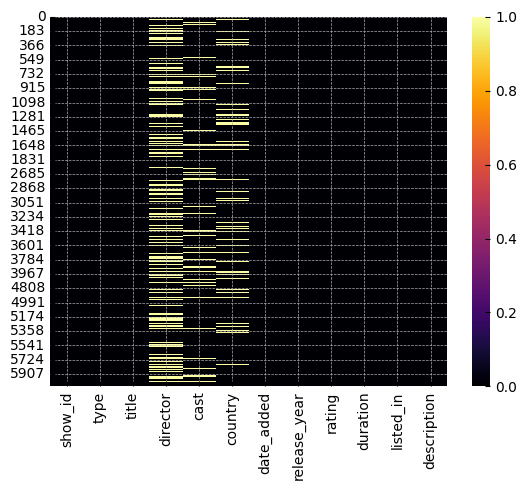

In [17]:
sns.heatmap(df.isnull(), cmap='inferno')

In [29]:
# Checking the percentage(%)
df.isnull().sum()/(len(df))*100

show_id         0.021119
type            0.021119
title           0.021119
director        0.000000
cast            0.000000
country         0.000000
date_added      0.000000
release_year    0.021119
rating          0.000000
listed_in       0.021119
description     0.021119
dtype: float64

**TAKING CARE OF MISSING VALUES***

In [31]:
#Director
df['director'].fillna ('No director', inplace=True)
#Cast
df['cast'].fillna ('No cast', inplace=True)
#country
df['country'].fillna ('No country', inplace=True)
#date_added
df['date_added'] = df['date_added'].fillna (df['date_added'].mode()[0])
#rating
df['rating']= df['rating'].fillna (df['rating'].mode()[0])
#droping duration
# df.drop("duration", axis=1, inplace=True)

show_id         1
type            1
title           1
director        0
cast            0
country         0
date_added      0
release_year    1
rating          0
listed_in       1
description     1
dtype: int64


<Axes: >

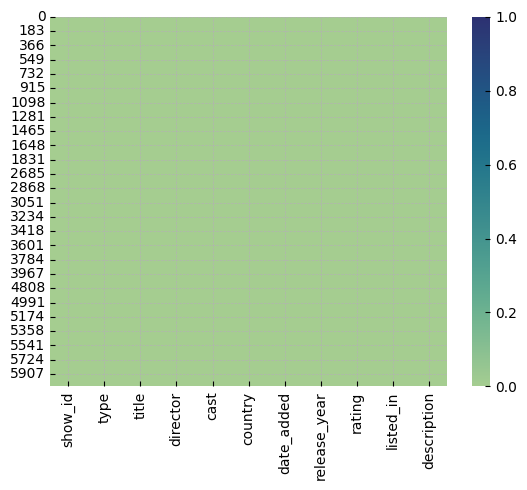

In [32]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), cmap='crest')

**EXPLORATORY DATA ANALYSIS(EDA)**

In [33]:
df.type.value_counts()

Movie      3448
TV Show    1285
type          1
Name: type, dtype: int64

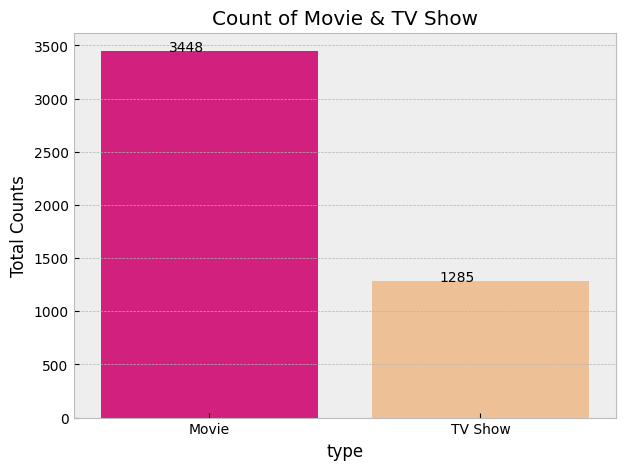

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'type' column

# Filter the DataFrame to include only 'Movie' and 'TV Show'
df_filtered = df[df['type'].isin(['Movie', 'TV Show'])]

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='type', data=df_filtered, palette='Accent_r')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height()))  # create the count on bar

plt.title('Count of Movie & TV Show')
plt.ylabel('Total Counts')

plt.show()


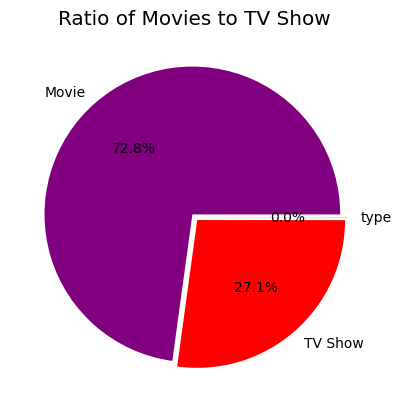

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate value counts for the 'type' column
value_counts = df['type'].value_counts()

# Get the number of categories
num_categories = len(value_counts)

# Generate the explode values
explode = tuple([0.025] * num_categories)

# Generate colors for the pie chart
colors = ['purple', 'red']

# Plot the pie chart
plt.pie(value_counts, explode=explode, labels=value_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Ratio of Movies to TV Show')
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'TV-PG'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'TV-Y7-FV'),
  Text(3, 0, 'TV-Y7'),
  Text(4, 0, 'TV-14'),
  Text(5, 0, 'R'),
  Text(6, 0, 'TV-Y'),
  Text(7, 0, 'NR'),
  Text(8, 0, 'PG-13'),
  Text(9, 0, 'TV-G'),
  Text(10, 0, 'PG'),
  Text(11, 0, 'G'),
  Text(12, 0, 'UR'),
  Text(13, 0, 'rating'),
  Text(14, 0, 'TV-Y8'),
  Text(15, 0, 'TV-15'),
  Text(16, 0, 'PG-14'),
  Text(17, 0, 'TV-Y9'),
  Text(18, 0, 'TV-16'),
  Text(19, 0, 'PG-15'),
  Text(20, 0, 'TV-Y10'),
  Text(21, 0, 'TV-17'),
  Text(22, 0, 'PG-16'),
  Text(23, 0, 'TV-Y11'),
  Text(24, 0, 'TV-18'),
  Text(25, 0, 'PG-17')])

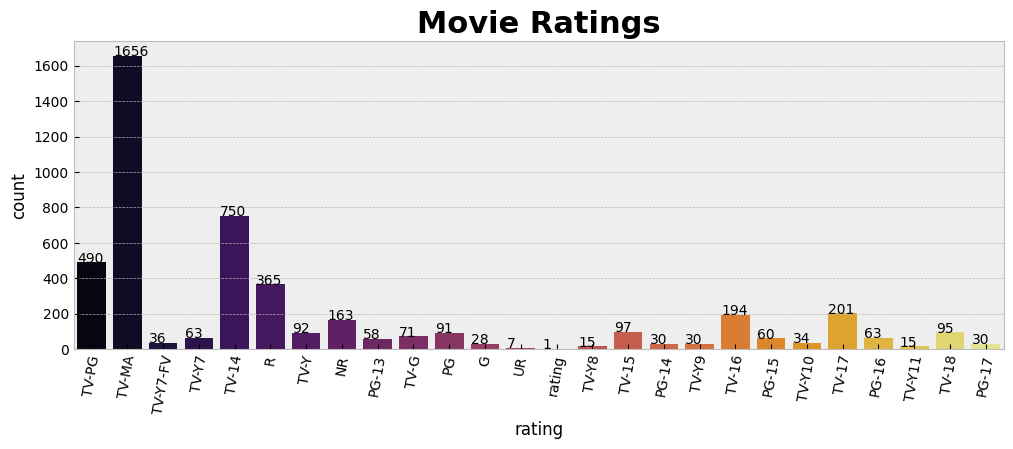

In [37]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(x=df.rating, palette='inferno')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.title('Movie Ratings', fontsize=22, fontweight="bold")
plt.xticks(rotation=80)


In [38]:
replace_structure = {
    'PG-13': 'TEENS',
    'PG-14': 'TEENS',
    'TV-MA': 'ADULTS',
    'PG': 'KIDS WITH GUIDANCE',
    'TV-14': 'TEENS',
    'TV-PG': 'KIDS WITH GUIDANCE',
    'TV-Y11': 'KIDS',
    'TV-Y7': 'KIDS',
    'R': 'ADULTS',
    'TV-G': 'KIDS',
    'G': 'KIDS',
    'NC-17': 'ADULTS',
    'NR': 'OTHER',
    'UR': 'OTHER',
    '74 min': 'OTHER',
    '84 min': 'OTHER',
    '66 min': 'OTHER',
    'TV-Y7-FV': 'KIDS'
}


In [39]:
df['rating'] = df['rating'].replace(replace_structure)

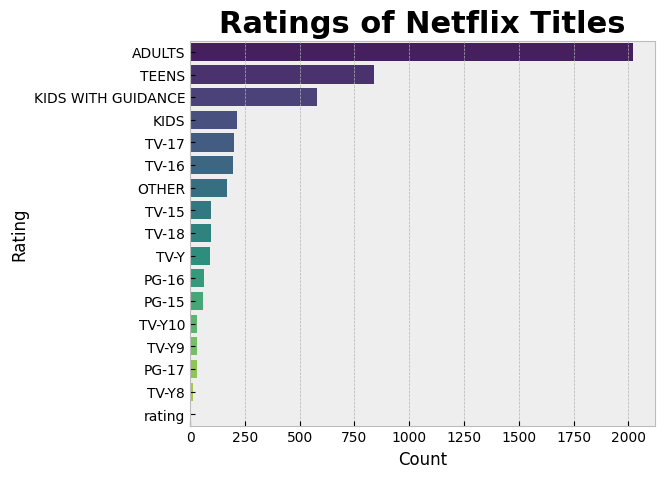

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.countplot(y='rating', data=df, palette='viridis', order=df['rating'].value_counts().index)
plt.title("Ratings of Netflix Titles", fontsize=22, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


**MOST COMMON WORD SEARCH IN TILES**


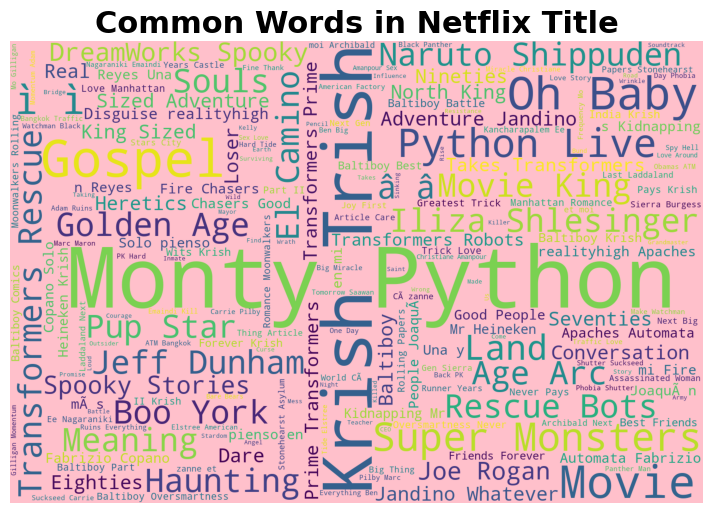

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color="pink", width=1500, height=1000)
wordcloud.generate(" ".join(df['title'].astype(str)))  # Convert 'title' column to string
plt.imshow(wordcloud)
plt.title('Common Words in Netflix Title', fontsize=22, fontweight='bold')
plt.axis('off')
plt.show()


**MOST COMMON ACTORS NAME**


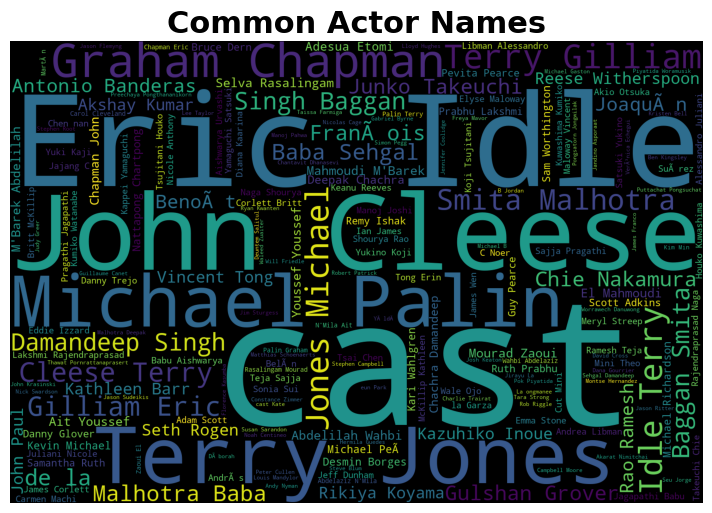

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color="black", width=1500, height=1000)
wordcloud.generate(" ".join(df['cast'].astype(str)))  # Convert 'cast' column to string
plt.imshow(wordcloud)
plt.title('Common Actor Names', fontsize=22, fontweight='bold')
plt.axis('off')
plt.show()


**MOST COMMON DIRECTORS**


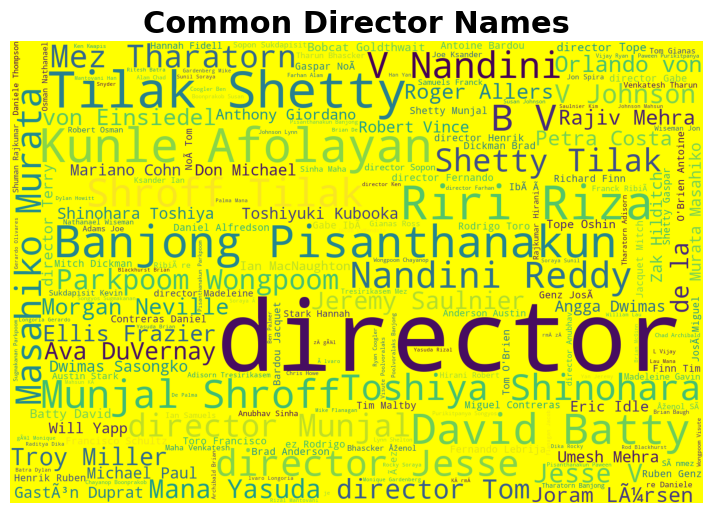

In [49]:
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color="yellow", width=1500, height=1000)
wordcloud.generate(" ".join(df['director'].astype(str)))  # Convert 'director' column to string
plt.imshow(wordcloud)
plt.title('Common Director Names', fontsize=22, fontweight='bold')
plt.axis('off')
plt.show()


**TOTAL MOVIES TV SHOWS**


In [50]:
import pandas as pd

# Assuming df is your DataFrame containing the 'release_year' column

# Step 1: Convert 'release_year' column to numeric (if necessary)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Step 2: Group by 'release_year' and count the occurrences
release_counts = df['release_year'].value_counts().sort_index()

# Displaying the values
print(release_counts)


1972.0      1
1973.0      1
1974.0      2
1976.0      1
1978.0      1
         ... 
2015.0     52
2016.0     92
2017.0    101
2018.0    125
2019.0    127
Name: release_year, Length: 4099, dtype: int64


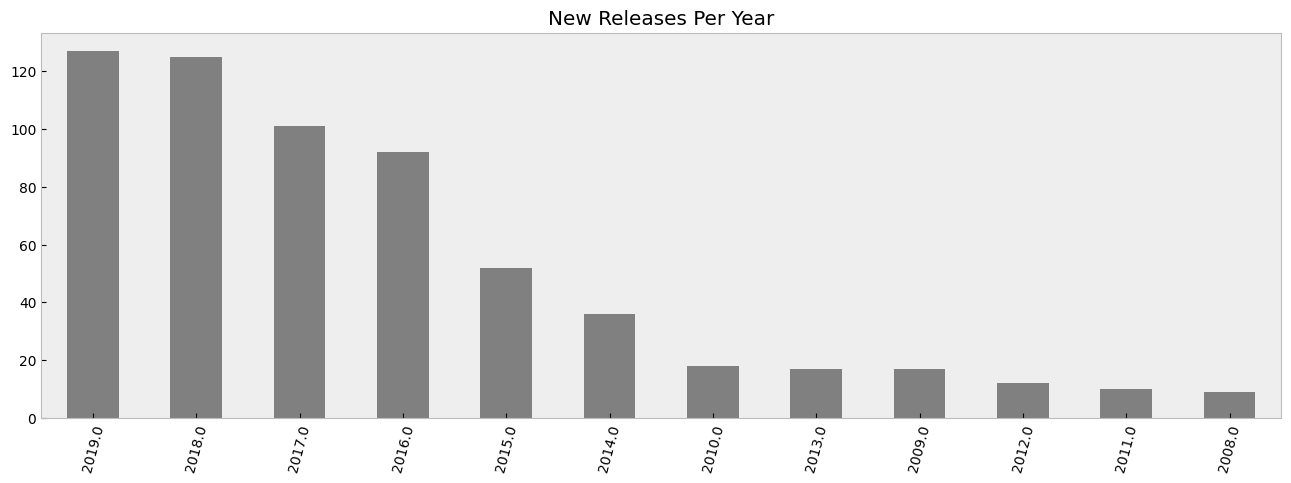

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'release_year' column

# Step 1: Convert 'release_year' column to numeric (if necessary)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Step 2: Convert release_year to strings to make the plot discrete
df['release_year'] = df['release_year'].astype(str)

# Step 3: Select distinct values for plotting (top 10-12 bars)
top_years = df['release_year'].value_counts().sort_values(ascending=False).head(12)

# Step 4: Plotting the data
plt.figure(figsize=(16, 5))
top_years.plot(kind='bar', color='gray')
plt.title('New Releases Per Year')
plt.xticks(rotation=75)
plt.grid(False)
plt.show()


In [61]:
df[df['type'] == 'Movie'].sort_values('release_year').head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description
374,80158480,Movie,Khoon Khoon,Mohammed Hussain,"Danny Denzongpa, Mahendra Sandhu, Rekha, Farya...",India,"September 1, 2017",1973.0,TEENS,"Action & Adventure, International Movies",As a crazed killer blazes a trail of blood thr...
566,15815343,Movie,The Texas Chainsaw Massacre,Tobe Hooper,"Gunnar Hansen, Jim Siedow, Marilyn Burns, Edwi...",United States,"October 22, 2019",1974.0,ADULTS,"Cult Movies, Horror Movies, Independent Movies",When some friends visit a vandalized graveyard...
379,80158545,Movie,Manoranjan,Shammi Kapoor,"Sanjeev Kumar, Zeenat Aman, Shammi Kapoor, Dev...",India,"September 1, 2017",1974.0,TEENS,"Comedies, International Movies, Music & Musicals","After getting fired, a police officer connects..."


In [62]:
df[df['type'] == 'TV Show'].sort_values('release_year').head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description
614,80236357,TV Show,Monty Python's Fliegender Zirkus,No director,"Graham Chapman, John Cleese, Eric Idle, Terry ...","United Kingdom, West Germany","October 2, 2018",1972.0,TEENS,"International TV Shows, TV Comedies",The Pythons elevate the absurd to new heights ...
369,70208520,TV Show,High Risk,No director,No cast,United States,"September 1, 2017",1988.0,KIDS,"Docuseries, Reality TV","From scientists to snake handlers, this series..."
616,80237311,TV Show,Monty Python's Personal Best,No director,"John Cleese, Terry Gilliam, Terry Jones, Graha...",United States,"October 2, 2018",2005.0,ADULTS,"British TV Shows, TV Comedies",Original members of the iconic Monty Python co...


**GENERE**

In [63]:
df['listed_in']

0       Children & Family Movies, Comedies
1                          Stand-Up Comedy
2                                 Kids' TV
3                                 Kids' TV
4                                 Comedies
                       ...                
6063                            Docuseries
6064                            Docuseries
6065                            Docuseries
6066                            Docuseries
6067                 Kids' TV, TV Comedies
Name: listed_in, Length: 4735, dtype: object

In [65]:
# turn long string into python list
df['listed_in'] = df['listed_in'].str.split(',')
df['listed_in'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: listed_in, dtype: float64

In [66]:
# with list inside the feature we can use .explode to tranform into structured data
print('before .explode',df.shape)
df2= df.explode ('listed_in')
print('after .explode', df2.shape)

before .explode (4735, 11)
after .explode (4735, 11)


In [67]:
pd.DataFrame(df2[df2['type'] != 'Movie'].listed_in.value_counts ()).head ()

,listed_in


In [68]:
pd.DataFrame(df2[df2['type'] != 'Movie'].listed_in.value_counts ()).head ()/ sum(pd.DataFrame(df2[df2['type']=='Movie'].listed_in.value_counts()) ['listed_in'])


,listed_in


In [69]:
pd.DataFrame (df2[df2['type']=='TV Show'].listed_in.value_counts()).head()

,listed_in


In [70]:
pd.DataFrame (df2[df2['type']=='TV Show'].listed_in.value_counts()).head()/sum(pd.DataFrame(df2[df2['type'] =='TV Show'].listed_in.value_counts())['listed_in'])

,listed_in


**HOW MOVIES & TV SHOWS CHANGED WITH DECADES**


In [71]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.release_year

0                 2019.0
1                 2016.0
2                 2013.0
3                 2016.0
4                 2017.0
              ...       
6063    2009.87004323314
6064    2009.86732035225
6065    2009.86459747137
6066    2009.86187459048
6067    2009.85915170959
Name: release_year, Length: 4735, dtype: object

In [ ]:
def get_decade(x):
  x = str(x)
  return x[:3] + '0s'

In [ ]:
df['decade'] = df['release_year'].apply(get_decade)
df.decade

0       2010s
1       2010s
2       2010s
3       2010s
4       2010s
        ...  
6063    2000s
6064    2000s
6065    2000s
6066    2000s
6067    2000s
Name: decade, Length: 4735, dtype: object

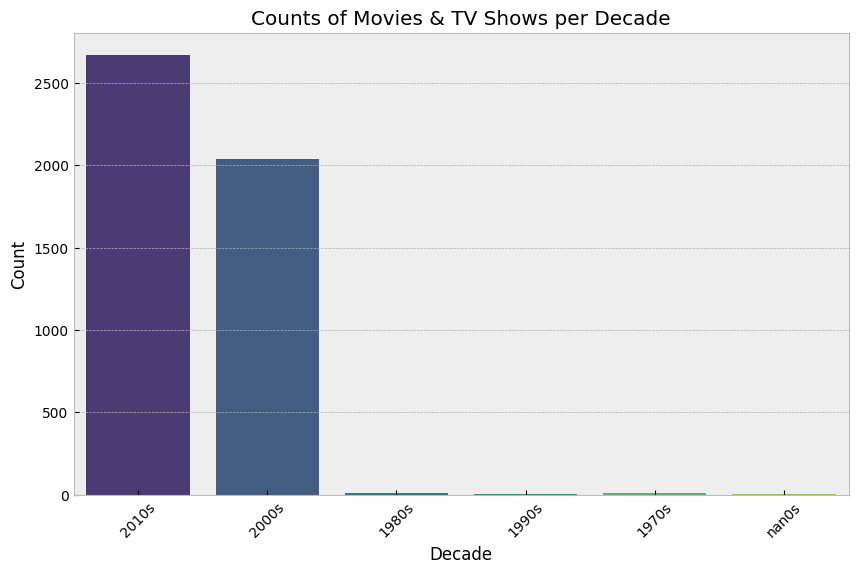

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'release_year' column

# Function to get decade from release_year
def get_decade(year):
    return str(year)[:3] + '0s'  # Assuming 'release_year' is in YYYY format

# Step 1: Apply the get_decade function to 'release_year' and create the 'decade' column
df['decade'] = df['release_year'].apply(get_decade)

# Step 2: Create a bar plot to visualize the counts of each decade
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='decade', palette='viridis')

# Step 3: Adding labels and title
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Counts of Movies & TV Shows per Decade')

# Step 4: Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


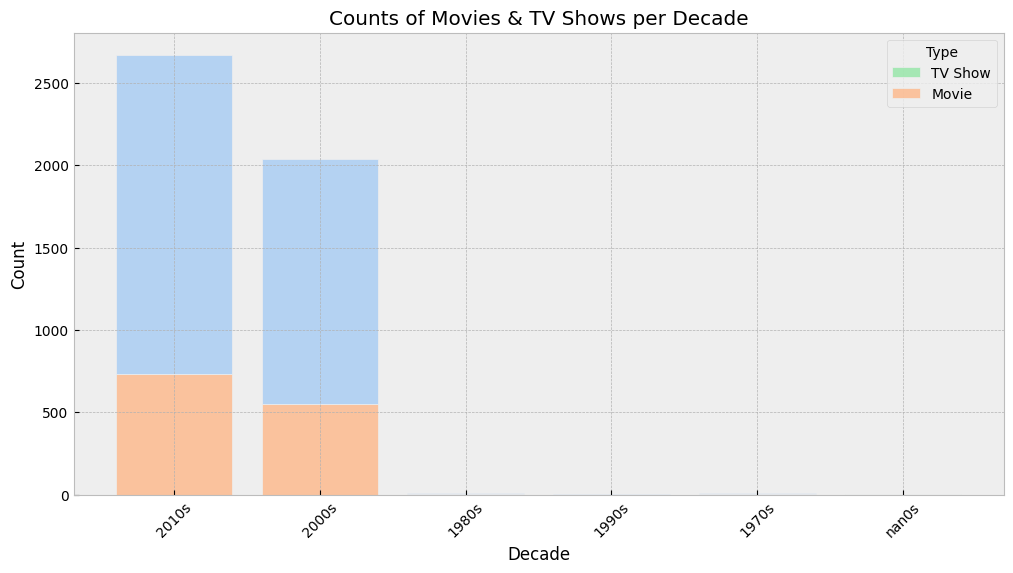

In [74]:
# Assuming df is your DataFrame containing the 'release_year' and 'type' columns

# Function to get decade from release_year
def get_decade(year):
    return str(year)[:3] + '0s'  # Assuming 'release_year' is in YYYY format

# Step 1: Apply the get_decade function to 'release_year' and create the 'decade' column
df['decade'] = df['release_year'].apply(get_decade)

# Step 2: Create a histogram to visualize the counts of 'TV Show' and 'Movie' for each decade
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='decade', hue='type', multiple='stack', palette='pastel', shrink=0.8)

# Step 3: Adding labels and title
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Counts of Movies & TV Shows per Decade')

# Step 4: Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

plt.legend(title='Type', loc='upper right', labels=['TV Show', 'Movie'])

plt.show()


In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the 'date_added' column

# Step 1: Convert 'date_added' column to datetime (if necessary)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 2: Create the 'Month' feature by extracting the month from the 'date_added' column
df['Month'] = df['date_added'].dt.month

# Step 3: Display the value counts of each month
month_counts = df['Month'].value_counts()

print(month_counts)


9.0     3012
10.0    1722
Name: Month, dtype: int64


**SENTIMENT ANALYSIS**



In [75]:
!pip install transformers
!pip install torch


  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/21/02/ae8e595f45b6c8edee07913892b3b41f5f5f273962ad98851dc6a564bbb9/transformers-4.31.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/116.9 kB ? eta -:--:--
     -------------------------------------- 116.9/116.9 kB 6.7 MB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.14.1 from https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4d49b7c43688bc2d36b3a47d2/huggingface_hub-0.16.4-py3-none-any.whl.metadata
  Obtaining dependency information for regex!=2019.12.17 from https://files.pythonhosted.org/packages/57/64/334ac6ed71e30eb370eeef457e899a176b99bfd367937c0f7e723c604e76/regex-2023.6.3-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB ? eta 0:00:00
     ---------------------------------------

     ---------------------------------------- 0.0/172.3 MB ? eta -:--:--
     ---------------------------------------- 0.2/172.3 MB 5.3 MB/s eta 0:00:33
     ---------------------------------------- 0.3/172.3 MB 3.4 MB/s eta 0:00:51
     ---------------------------------------- 0.4/172.3 MB 3.4 MB/s eta 0:00:50
     ---------------------------------------- 0.5/172.3 MB 3.1 MB/s eta 0:00:57
     ---------------------------------------- 0.7/172.3 MB 3.2 MB/s eta 0:00:54
     ---------------------------------------- 0.8/172.3 MB 3.0 MB/s eta 0:00:58
     ---------------------------------------- 1.0/172.3 MB 3.1 MB/s eta 0:00:57
     ---------------------------------------- 1.1/172.3 MB 3.0 MB/s eta 0:00:58
     ---------------------------------------- 1.2/172.3 MB 3.0 MB/s eta 0:00:58
     ---------------------------------------- 1.4/172.3 MB 3.0 MB/s eta 0:00:58
     ---------------------------------------- 1.5/172.3 MB 2.9 MB/s eta 0:00:58
     ---------------------------------------- 1

In [ ]:
from transformers import pipeline


In [ ]:
sentiment_analyzer = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
text = "As much I love you, I hate you"
result = sentiment_analyzer(text)

# The 'result' variable now contains the sentiment analysis output.
# The sentiment label and score will be displayed as follows:
print(result)


[{'label': 'NEGATIVE', 'score': 0.9492855072021484}]


A polarity score of -**1** indicates extremely **negative** sentiment.
A polarity score of **0** indicates **neutral** sentiment.
A polarity score of **1** indicates extremely **positive** sentiment

Enter the title of the movie: Krish Trish and Baltiboy: The Greatest Trick


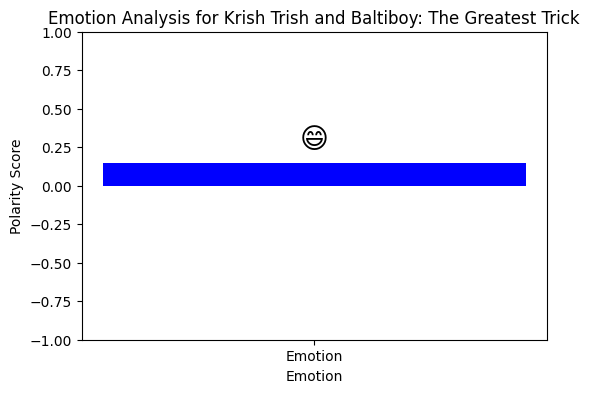

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the Netflix dataset (assuming you have already loaded the data into the DataFrame 'df')
# Replace 'netflix_data.csv' with the actual path to your Netflix dataset file
df = pd.read_excel('NETFLIX DATA.xlsx')


# Step 2: Ask the user to input a movie title
movie_title = input("Enter the title of the movie: ")

# Step 3: Extract the description for the user-specified movie
description = df[df['title'] == movie_title]['description'].iloc[0]

# Step 4: Perform sentiment analysis to get the emotions (polarity)
analysis = TextBlob(description)
polarity_score = analysis.sentiment.polarity

# Step 5: Define emojis for different emotions
positive_emoji = '😄'
negative_emoji = '😞'
neutral_emoji = '😐'

# Step 6: Map the sentiment polarity to the appropriate emoji
if polarity_score > 0:
    emotion_emoji = positive_emoji
elif polarity_score < 0:
    emotion_emoji = negative_emoji
else:
    emotion_emoji = neutral_emoji

# Step 7: Visualize the emotions using a bar chart with emojis
plt.figure(figsize=(6, 4))
plt.bar(['Emotion'], [polarity_score], color=['blue' if polarity_score >= 0 else 'red'])
plt.ylim(-1, 1)
plt.title(f'Emotion Analysis for {movie_title}')
plt.xlabel('Emotion')
plt.ylabel('Polarity Score')
plt.text(0, polarity_score + 0.1, emotion_emoji, fontsize=20, ha='center')
plt.show()


In [ ]:
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go

# Load the Netflix dataset (assuming you have already loaded the data into the DataFrame 'df')
# Replace 'netflix_data.csv' with the actual path to your Netflix dataset file
df = pd.read_excel('NETFLIX DATA.xlsx')

# Step 2: Ask the user to input a movie title
movie_title = input("Enter the title of the movie: ")

# Step 3: Extract the description for the user-specified movie
description = df[df['title'] == movie_title]['description'].iloc[0]

# Step 4: Perform sentiment analysis to get the emotions (polarity)
analysis = TextBlob(description)
polarity_score = analysis.sentiment.polarity

# Step 5: Define emojis for different emotions
positive_emoji = '😄'
negative_emoji = '😞'
neutral_emoji = '😐'

# Step 6: Map the sentiment polarity to the appropriate emoji
if polarity_score > 0:
    emotion_emoji = positive_emoji
elif polarity_score < 0:
    emotion_emoji = negative_emoji
else:
    emotion_emoji = neutral_emoji

# Step 7: Create an animated bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Emotion'],
    y=[0],
    marker=dict(color='blue', line=dict(color='black', width=1)),
    name='Emotion',
    hoverinfo='none',
))

fig.add_trace(go.Bar(
    x=['Emotion'],
    y=[polarity_score],
    marker=dict(color='blue' if polarity_score >= 0 else 'red', line=dict(color='black', width=1)),
    name='Emotion',
    hoverinfo='none',
))

fig.update_layout(
    title=f'Emotion Analysis for {movie_title}',
    xaxis_title='Emotion',
    yaxis_title='Polarity Score',
    yaxis_range=[-1, 1],
    showlegend=False,
)

fig.add_annotation(
    x=0,
    y=polarity_score + 0.1,
    text=emotion_emoji,
    showarrow=False,
    font=dict(size=40),
)

fig.update_yaxes(showline=False, showgrid=False, zeroline=False)

# Display the interactive animation
fig.show()


Enter the title of the movie: Naruto the Movie 3: Guardians of the Crescent Moon Kingdom


-------------------------X--------------X-------------------------------


In [ ]:
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go

# Load the Netflix dataset (assuming you have already loaded the data into the DataFrame 'df')
# Replace 'netflix_data.csv' with the actual path to your Netflix dataset file
df = pd.read_excel('NETFLIX DATA.xlsx')

# Step 2: Ask the user to input a movie title
movie_title = input("Enter the title of the movie: ")

# Step 3: Extract the description for the user-specified movie
description = df[df['title'] == movie_title]['description'].iloc[0]

# Step 4: Perform sentiment analysis to get the emotions (polarity)
analysis = TextBlob(description)
polarity_score = analysis.sentiment.polarity

# Step 5: Define emojis for different emotions
positive_emoji = '😄'
negative_emoji = '😞'
neutral_emoji = '😐'

# Step 6: Map the sentiment polarity to the appropriate emoji
if polarity_score > 0:
    emotion_emoji = positive_emoji
elif polarity_score < 0:
    emotion_emoji = negative_emoji
else:
    emotion_emoji = neutral_emoji

# Step 7: Ask the user to provide feedback or rating for the movie
user_rating = input(f"How would you rate '{movie_title}' on a scale of 1 to 5? ")

# Convert the user_rating to a numeric value (if it's a string)
user_rating = float(user_rating)

# Step 8: Store the user's feedback or rating for future analysis or recommendation improvements
# You can save the feedback in a separate DataFrame or database for further processing.

# Step 9: Create an animated bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Emotion'],
    y=[0],
    marker=dict(color='blue', line=dict(color='black', width=1)),
    name='Emotion',
    hoverinfo='none',
))

fig.add_trace(go.Bar(
    x=['Emotion'],
    y=[polarity_score],
    marker=dict(color='blue' if polarity_score >= 0 else 'red', line=dict(color='black', width=1)),
    name='Emotion',
    hoverinfo='none',
))

fig.update_layout(
    title=f'Emotion Analysis for {movie_title}',
    xaxis_title='Emotion',
    yaxis_title='Polarity Score',
    yaxis_range=[-1, 1],
    showlegend=False,
)

fig.add_annotation(
    x=0,
    y=polarity_score + 0.1,
    text=emotion_emoji,
    showarrow=False,
    font=dict(size=40),
)

fig.update_yaxes(showline=False, showgrid=False, zeroline=False)

# Display the interactive animation
fig.show()


Enter the title of the movie: Love
How would you rate 'Love' on a scale of 1 to 5? 4


In [ ]:
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go

# Load the Netflix dataset (assuming you have already loaded the data into the DataFrame 'df')
# Replace 'netflix_data.csv' with the actual path to your Netflix dataset file
df = pd.read_excel('NETFLIX DATA.xlsx')

# Step 2: Ask the user to input a movie title
movie_title = input("Enter the title of the movie: ")

# Step 3: Extract the description for the user-specified movie
description = df[df['title'] == movie_title]['description'].iloc[0]

# Step 4: Perform sentiment analysis to get the emotions (polarity)
analysis = TextBlob(description)
polarity_score = analysis.sentiment.polarity

# Step 5: Define emojis for different emotions
positive_emoji = '😄'
negative_emoji = '😞'
neutral_emoji = '😐'

# Step 6: Map the sentiment polarity to the appropriate emoji
if polarity_score > 0:
    emotion_emoji = positive_emoji
elif polarity_score < 0:
    emotion_emoji = negative_emoji
else:
    emotion_emoji = neutral_emoji

# Step 7: Ask the user to provide feedback or rating for the movie
user_rating = input(f"How would you rate '{movie_title}' on a scale of 1 to 5? ")

# Convert the user_rating to a numeric value (if it's a string)
user_rating = float(user_rating)

# Step 8: Store the user's feedback or rating for future analysis or recommendation improvements
# You can save the feedback in a separate DataFrame or database for further processing.

# Step 9: Fetch the genre of the movie from the 'listed_in' column
movie_genre = df[df['title'] == movie_title]['listed_in'].iloc[0]

# Step 10: Create an animated bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Emotion'],
    y=[0],
    marker=dict(color='blue', line=dict(color='black', width=1)),
    name='Emotion',
    hoverinfo='none',
))

fig.add_trace(go.Bar(
    x=['Emotion'],
    y=[polarity_score],
    marker=dict(color='blue' if polarity_score >= 0 else 'red', line=dict(color='black', width=1)),
    name='Emotion',
    hoverinfo='none',
))

fig.update_layout(
    title=f'Emotion Analysis for "{movie_title}"',
    xaxis_title='Emotion',
    yaxis_title='Polarity Score',
    yaxis_range=[-1, 1],
    showlegend=False,
)

fig.add_annotation(
    x=0,
    y=polarity_score + 0.1,
    text=emotion_emoji,
    showarrow=False,
    font=dict(size=40),
)

fig.add_annotation(
    x=0,
    y=-0.4,
    text=f'Genre: {movie_genre}',
    showarrow=False,
    font=dict(size=16),
)

fig.update_yaxes(showline=False, showgrid=False, zeroline=False)

# Display the interactive animation
fig.show()


Enter the title of the movie: Ben 10
How would you rate 'Ben 10' on a scale of 1 to 5? 4


In [ ]:
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go

# Load the Netflix dataset (assuming you have already loaded the data into the DataFrame 'df')
# Replace 'NETFLIX DATA.xlsx' with the actual path to your Netflix dataset file
df = pd.read_excel('NETFLIX DATA.xlsx')

def get_user_input():
    print("Welcome to the Movie Emotion Analysis Tool!")
    movie_title = input("Please enter the title of the movie you want to analyze: ")
    return movie_title

def perform_sentiment_analysis(description):
    analysis = TextBlob(description)
    polarity_score = analysis.sentiment.polarity

    positive_emoji = '😄'
    negative_emoji = '😞'
    neutral_emoji = '😐'

    if polarity_score > 0.2:
        emotion_emoji = positive_emoji
        sentiment_text = "Positive"
    elif polarity_score < -0.2:
        emotion_emoji = negative_emoji
        sentiment_text = "Negative"
    else:
        emotion_emoji = neutral_emoji
        sentiment_text = "Neutral"

    print(f"Movie Description: {description}")
    print(f"The movie's sentiment analysis result is **{sentiment_text}**.")
    print(f"Recommendation: This movie seems to have a {sentiment_text.lower()} sentiment. "
          f"You might enjoy watching it!" if polarity_score > 0.2
          else f"Recommendation: This movie seems to have a {sentiment_text.lower()} sentiment. "
               f"You may want to consider another title." if polarity_score < -0.2
          else "Recommendation: This movie's sentiment is relatively neutral. "
               "Give it a try and form your own opinion!")

    return polarity_score, emotion_emoji

def plot_emotion_analysis(movie_title, polarity_score, emotion_emoji):
    movie_genre = df[df['title'] == movie_title]['listed_in'].iloc[0]

    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=['Emotion'],
        y=[0],
        marker=dict(color='blue', line=dict(color='black', width=1)),
        name='Emotion',
        hoverinfo='none',
    ))

    fig.add_trace(go.Bar(
        x=['Emotion'],
        y=[polarity_score],
        marker=dict(color='blue' if polarity_score >= 0 else 'red', line=dict(color='black', width=1)),
        name='Emotion',
        hoverinfo='none',
    ))

    fig.update_xaxes(title_text='Emotion', showline=True, showgrid=False, zeroline=False)
    fig.update_yaxes(title_text='Polarity Score', showline=True, showgrid=False, zeroline=False)
    fig.update_layout(
        title=f'Emotion Analysis for "{movie_title}"',
        xaxis_title='Emotion',
        yaxis_title='Polarity Score',
        yaxis_range=[-1, 1],
        showlegend=False,
        template='plotly_white',  # Change the background template for better readability
    )

    fig.add_annotation(
        x=0,
        y=polarity_score + 0.1,
        text=emotion_emoji,
        showarrow=False,
        font=dict(size=40),
    )

    fig.add_annotation(
        x=0,
        y=-0.4,
        text=f'Genre: {movie_genre}',
        showarrow=False,
        font=dict(size=16),
    )

    fig.update_yaxes(showline=False, showgrid=False, zeroline=False)

    # Display the interactive animation
    fig.show()

def main():
    movie_title = get_user_input()
    description = df[df['title'] == movie_title]['description'].iloc[0]

    polarity_score, emotion_emoji = perform_sentiment_analysis(description)

    plot_emotion_analysis(movie_title, polarity_score, emotion_emoji)

if __name__ == "__main__":
    main()


Welcome to the Movie Emotion Analysis Tool!
Please enter the title of the movie you want to analyze: Love
Movie Description: A man in an unsatisfying marriage recalls the details of an intense past relationship with an ex-girlfriend when he gets word that she may be missing.
The movie's sentiment analysis result is **Neutral**.
Recommendation: This movie's sentiment is relatively neutral. Give it a try and form your own opinion!


Note: In order to run the code you need to upload the xlsx file first.